### Gonzalo Alvis

Usar urbanpy para descargar datos de una ciudad 

### Librerias

- urbanpy
- plotly
- geopandas

In [1]:
import warnings
import sys
import urbanpy as up
import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm.notebook import tqdm

sys.path.append("..")
warnings.filterwarnings("ignore") 
tqdm.pandas()

### Mapa

In [3]:
ciudad = up.download.nominatim_osm(
    "Barcelona, España"
)  # expected_position is 0 by default

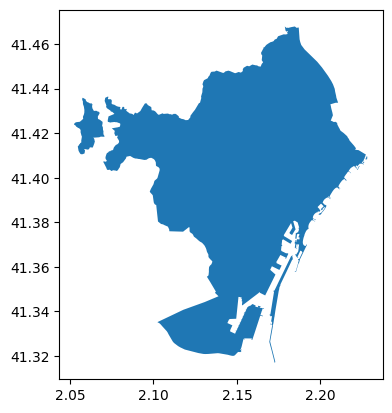

In [4]:
ciudad.plot()

plt.show()

### population data

In [5]:
city_resources=up.download.search_hdx_dataset("Spain")
city_resources

,created,name,population,size_mb,url
id,,,,,
0,2020-03-04,esp_general_2020_csv.zip,Overall population density,222.35,https://data.humdata.org/dataset/80d0519e-0eaf...
8,2019-09-23,esp_children_under_five_2020_csv.zip,Children (ages 0-5),221.25,https://data.humdata.org/dataset/80d0519e-0eaf...
9,2019-09-23,esp_elderly_60_plus_2020_csv.zip,Elderly (ages 60+),222.65,https://data.humdata.org/dataset/80d0519e-0eaf...
10,2019-09-23,esp_men_2020_csv.zip,Men,222.07,https://data.humdata.org/dataset/80d0519e-0eaf...
11,2019-09-23,esp_women_2020_csv.zip,Women,222.16,https://data.humdata.org/dataset/80d0519e-0eaf...
12,2019-09-23,esp_women_of_reproductive_age_15_49_2020_csv.zip,Women of reproductive age (ages 15-49),222.44,https://data.humdata.org/dataset/80d0519e-0eaf...


In [6]:
pop_spn=up.download.get_hdx_dataset(city_resources,0)
pop_spn.head()

,longitude,latitude,esp_general_2020
0,-1.269444,44.0,0.673977
1,-1.268611,44.0,0.673977
2,-1.160833,44.0,0.536216
3,-1.158333,44.0,0.536216
4,-1.006944,44.0,0.539089


### Conversion a puntos y hexagonos

In [7]:
pop_ba=up.geom.filter_population(pop_spn,ciudad)

<Axes: >

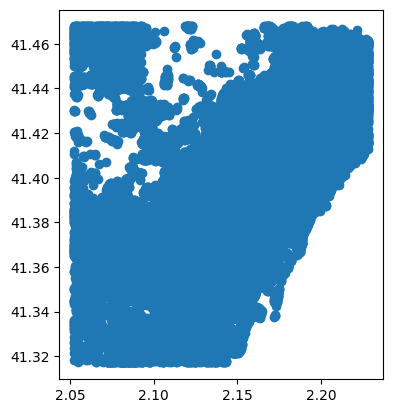

In [8]:
pop_ba.plot()

In [9]:
hex_ba=up.geom.gen_hexagons(resolution=9,city=ciudad)
hex_ba.shape

(991, 2)

### Mergeando layers

In [10]:
pop_ba.head()

,longitude,latitude,esp_general_2020,geometry
9828392,2.052500,41.467778,11.406598,POINT (2.05250 41.46778)
9828393,2.053333,41.467778,5.703299,POINT (2.05333 41.46778)
9828394,2.053611,41.467778,5.703299,POINT (2.05361 41.46778)
9828395,2.053889,41.467778,5.703299,POINT (2.05389 41.46778)
9828396,2.054167,41.467778,5.703299,POINT (2.05417 41.46778)


In [11]:
hex_ba=up.geom.merge_shape_hex(hex_ba,pop_ba,agg={"esp_general_2020":"sum"})

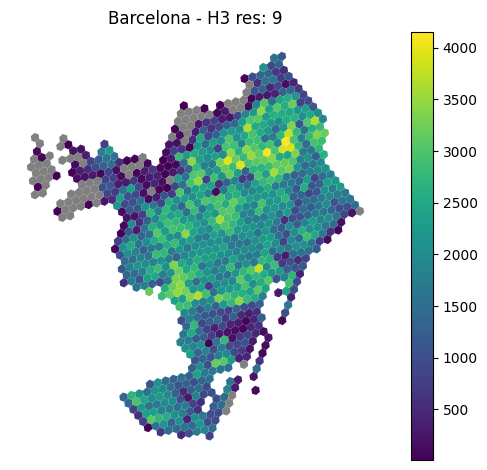

In [12]:
hex_ba.plot(
    "esp_general_2020", legend=True, missing_kwds={"color": "grey"}
)
plt.title("Barcelona - H3 res: 9")
plt.axis(False)
plt.tight_layout()